In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
from astropy.table import Table
from astropy.table import QTable
import numpy.ma as ma
import pandas as pd

In [2]:
basePath = '/home/tnguser/sims.TNG/TNG100-1/output'

In [3]:
fields = ['GroupFirstSub','Group_M_Crit200', 'Group_R_Crit200', 'GroupVel', 'GroupSFR', 'GroupCM', 'GroupMassType']
#z=0 group catalogs (snapshot 99)
halos = il.groupcat.loadHalos(basePath, 99, fields=fields)

In [4]:
#fofmass = np.log10(halos['Group_M_Crit200']/0.6774)+10
IDfof = np.where((np.log10(halos['Group_M_Crit200']/0.6774)+10 > 13))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


In [5]:
print(np.shape(np.log10(halos['Group_M_Crit200'][IDfof]/0.6774)+10))

(182,)


In [6]:
candidatesmass = np.log10(halos['Group_M_Crit200'][IDfof]/0.6774)+10
candidatesubfirst = halos['GroupFirstSub'][IDfof[0]]

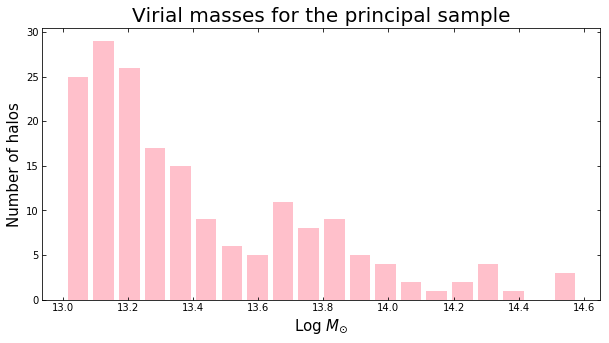

In [82]:
plt.figure(figsize=(10,5))
plt.hist(candidatesmass, color='pink', rwidth=0.8, bins=20)
plt.title('Virial masses for the principal sample',fontsize=20)
plt.xlabel('Log $M_{\odot}$', fontsize=15)
plt.ylabel('Number of halos', fontsize=15)
plt.tick_params(axis='x',direction='in',top=True)
plt.tick_params(axis='y', direction='in', right=True)
#plt.show()
plt.savefig('allthedata.jpg')

# subhalos

In [8]:
fields2 = ['SubhaloLen','SubhaloFlag','SubhaloMass','SubhaloSFRinRad','SubhaloGrNr', 'SubhaloMassType','SubhaloStellarPhotometrics', 'SubhaloMassInRadType', 'SubhaloPos']
#cambiar la masa total por la masa estelar que deberia estar en el array de masstype
snapNum = 99
subhalos = il.groupcat.loadSubhalos(basePath, snapNum, fields=fields2)

In [9]:
IDshstellarmasscondition = np.where(((np.log10((subhalos['SubhaloMassType'][:,4])/0.6774)+10)>9.5) & (subhalos['SubhaloFlag'] !=0))[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [10]:
np.log10((subhalos['SubhaloMassType'][IDshstellarmasscondition,4])/0.6774)+10

array([12.56885675, 11.74724996, 11.79736423, ...,  9.73481059,
        9.60495348,  9.548693  ])

In [11]:
IDsubhaloshalos = halos['GroupFirstSub'][IDfof]

In [12]:
SUBHALOS = np.isin(IDshstellarmasscondition, halos['GroupFirstSub'][IDfof])
HALOS = np.isin(halos['GroupFirstSub'][IDfof], IDshstellarmasscondition)

In [13]:
#np.set_printoptions(threshold=np.inf)
#print(massi)
#massiveSh = IDsubhaloshalos[SUBHALOS]

In [14]:
#subhalos (diccionario con la importacion)
#IDsubhalosstars (ID de los subhalos con masa_estelar > 9.5)

listadelistas = []
for i in range(len(IDfof[0])):
    listadelistas.append([])

for i in range(len(IDfof[0])):
    groupnumber = IDfof[0][i]
    #for i in range(subhalos['count']):
    #    if subhalos['SubhaloGrNr'][i] == groupnumber and i not in listadelistas:
    #        listadelistas[i].append(i)
    for util in IDshstellarmasscondition:
        if subhalos['SubhaloGrNr'][util] == groupnumber:
            listadelistas[i].append(util)
            
groups = [IDfof, listadelistas]
